##Objective

To categorise the countries using socio-economic and health factors that determine the overall development of the country using unsupervised machine learning

###Problem Statement

HELP International have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. So, CEO has to make decision to choose the countries that are in the direst need of aid. Hence, your Job as a Data scientist is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.

In [1]:
#Importing the Required Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import plotly.express as px
from sklearn.pipeline import make_pipeline
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

##Understanding the Data

In [2]:
#The dictionary

data_2 = pd.read_csv('data-dictionary.csv')

data_2.head(10)

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 100...
2,exports,Exports of goods and services per capita. Give...
3,health,Total health spending per capita. Given as %ag...
4,imports,Imports of goods and services per capita. Give...
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of t...
7,life_expec,The average number of years a new born child w...
8,total_fer,The number of children that would be born to e...
9,gdpp,The GDP per capita. Calculated as the Total GD...


In [3]:
# Understanding the dataset

data_1 = pd.read_csv('Country-data.csv')

data_1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
data_1.shape

(167, 10)

There are 10 columns and 167 rows.

In [5]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


As you can see, there are no missing values in our dataset and all features except country are numerical.

In [ ]:
data_1.describe().T

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,38.270060,40.328931,2.6000,8.250,19.30,62.10,208.00
exports,167.0,41.108976,27.412010,0.1090,23.800,35.00,51.35,200.00
health,167.0,6.815689,2.746837,1.8100,4.920,6.32,8.60,17.90
imports,167.0,46.890215,24.209589,0.0659,30.200,43.30,58.75,174.00
income,167.0,17144.688623,19278.067698,609.0000,3355.000,9960.00,22800.00,125000.00
inflation,167.0,7.781832,10.570704,-4.2100,1.810,5.39,10.75,104.00
life_expec,167.0,70.555689,8.893172,32.1000,65.300,73.10,76.80,82.80
total_fer,167.0,2.947964,1.513848,1.1500,1.795,2.41,3.88,7.49
gdpp,167.0,12964.155689,18328.704809,231.0000,1330.000,4660.00,14050.00,105000.00


Plotting the Countries and seeing the features through a colour scheme.

GDP PER COUNTRY

In [ ]:
fig = px.choropleth(data_1,
                    locationmode='country names',
                    locations='country',
                    color='gdpp',
                    title='Coutries by gdpp'
                   )
fig.show()

From here we can not a few things in relation to GDP:


1.   Africa and other Asian countries are least performing.
2.   America, Europe and Australia seem to be the top teer countries  



CHILD MORTALITY PER COUNTRY

In [ ]:
fig = px.choropleth(data_1,
                    locationmode='country names',
                    locations='country',
                    color='child_mort',
                    title='Coutries by child_mort'
                   )
fig.show()

We can note that Africa leading in regards to child mortality rate. The factors that my be contributing to this include:


*   Neonatal causes (probability of death during the first 28 days of birth)
*   Child pneumonia
*   Malaria
*   Diarrhoea





INCOME PER COUNTRY

In [ ]:
fig = px.choropleth(data_1,
                    locationmode='country names',
                    locations='country',
                    color='income',
                    title='Coutries by income'
                   )
fig.show()

We can note here that Africa, South America and the Asian region are the least continents where one is likely to make a good income. Norway is the highest income country but this would also translate to high cost of living and expenditure.

##Numerical Data Distribution

In [6]:
list(set(data_1.dtypes.tolist()))

[dtype('O'), dtype('int64'), dtype('float64')]

On looking at the distribution we can see that we have three distinct data types:


*   Integer
*   Float
*   Object





We want to work with only the numeric features.

In [8]:
df_num = data_1.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


Looking at the distribution of the numeric features.

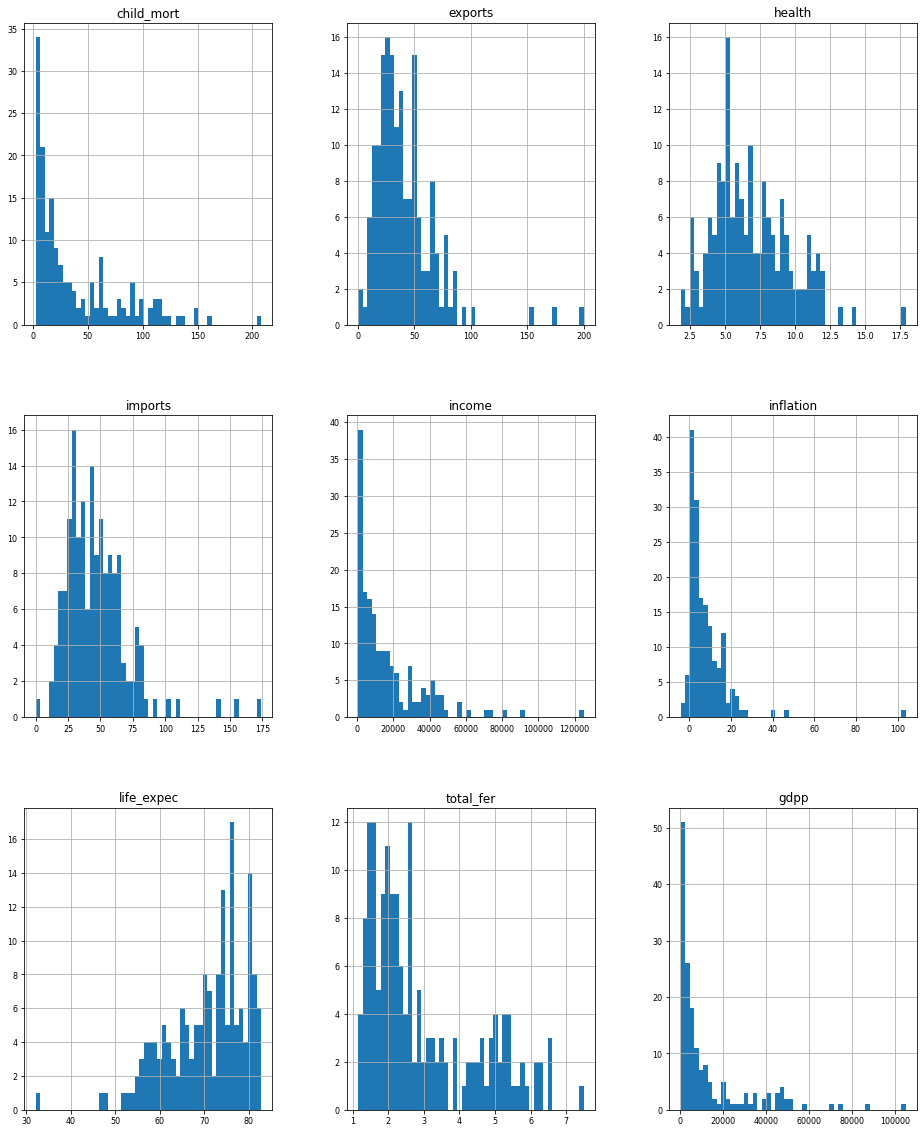

In [9]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); 

###Correlation

I chose to use GDP to look since this usually a key indicator towards financial health of a country. GDP does touch on alot of socio and economic factors facing countries.

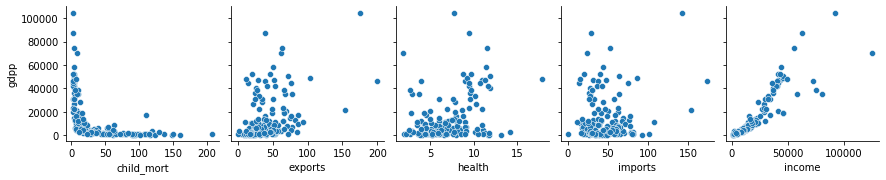

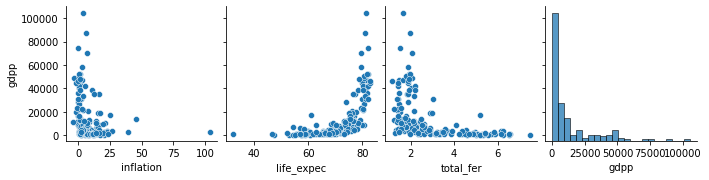

In [ ]:
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+5],
                y_vars=['gdpp'])

We can clearly see that GDP has a negative correlation with child mortality, this means that countries with good GDP have low mortality rates, like USA and Europe.

Another key finding is GDP in relation to total fertility, there is a negative correlation hence few babies are being born in high GDP countries.This could be as a result of low social or cultural interactions as a result of high employability.


###Introducing our clustering models.

In [10]:
x=data_1.drop(['country'],axis=1).values

###Choosing the number of clusters

WCSS -> Within Clusters Sum of Squares

The higher the value of WCSS is, the clustering will be less accurate.

*   The lesser the value of WCSSS, the clustering will be more accurate.
*   The higher the value of WCSS is, the clustering will be less accurate.
*   kmeans.intertia_ has the WCSS value for the current number of clusters.
*   init = 'K-means++' is the centroid initialization for each cluster.
 
(Choosing the right random data point in each cluster.)

In [11]:
Wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=9)
    kmeans.fit(x)
    Wcss.append(kmeans.inertia_)
print(Wcss)

[117459687469.07816, 36528387934.322105, 21710210039.754135, 14610713446.53513, 10665874358.647747, 7655725089.094502, 5353767457.732323, 4260514816.115401, 3249350807.2762313, 2709452471.109109]


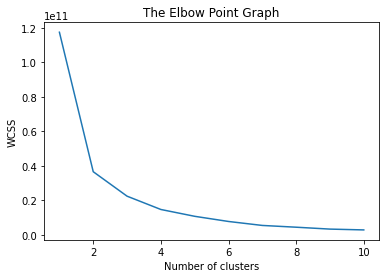

In [13]:
# Create 10 models with 1 to 10 clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    # Fit the data points
    kmeans.fit(x)
    # Get the WCSS (inertia) value
    wcss.append(kmeans.inertia_)
    
#Plot the WCSS values onto a line graph
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

The drastic change at some point shows the best number of clusters. That's why curve at the 3 clusters shows the elbow like shape hence Optimal no fo clusters is 3.

### Training the Model

In [14]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=9)
y=kmeans.fit_predict(x)
y

array([0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 1, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

Creating a new feature column.

In [15]:
data_1['Cluster']=y

In [16]:
import warnings
warnings.filterwarnings("ignore")

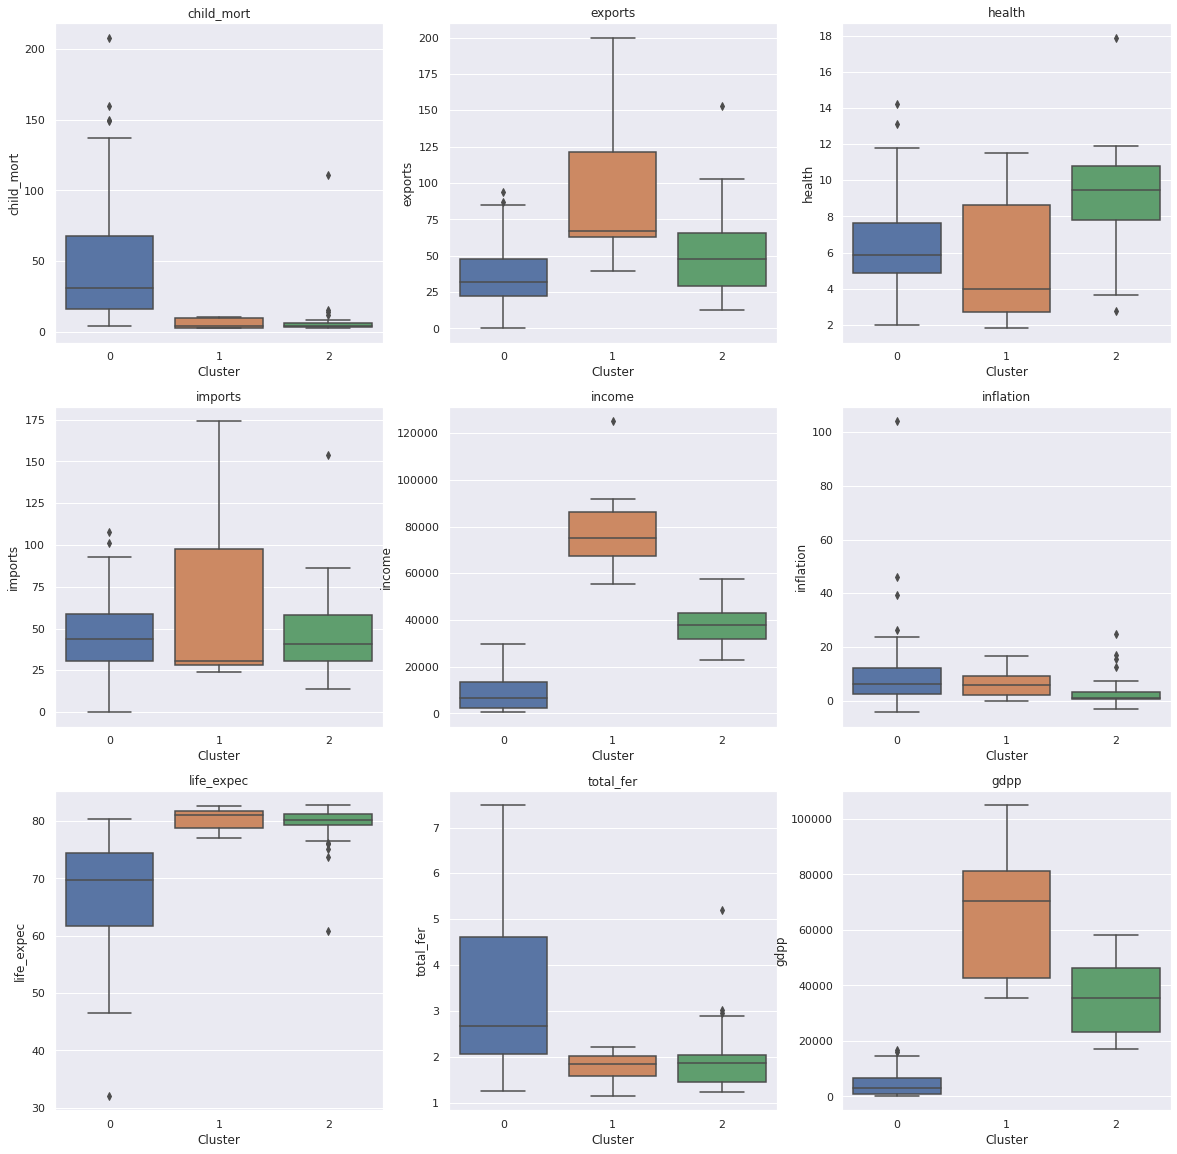

In [ ]:
l=['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']
plt.figure(figsize=(20,20))
for i in range(len(l)):
    plt.subplot(3,3,i+1)
    sns.boxplot(data_1.Cluster,data_1[l[i]])
    plt.title(l[i])

The box-plots are able to plot the clusters you can see where the desniley packed clusters are.Most of the action is found at health, imports, gdp and total fertility.

But its a bit hard for one to make a conclusive remark, hence i proceeded to utilize the world map to display my cluster distribution.

Building a pipeline

In [17]:
scaler = StandardScaler()
kmeans = KMeans(n_clusters=3,random_state=42)
pipeline = make_pipeline(scaler,kmeans)

In [18]:
t = data_1.drop('country',axis=1)

In [19]:
pipeline.fit(t)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=3, random_state=42))])

In [20]:
clusters = pipeline.predict(t)

In [21]:
country = data_1.iloc[:,0]

In [22]:
# creating dataframe with countries and clusters
final = pd.DataFrame({'clusters':clusters,'country':country})
final

,clusters,country
0,0,Afghanistan
1,1,Albania
2,1,Algeria
3,0,Angola
4,1,Antigua and Barbuda
...,...,...
162,1,Vanuatu
163,1,Venezuela
164,1,Vietnam
165,0,Yemen


Plotting the map based on cluster distribution.

In [25]:
fig = px.choropleth(final,
                    locationmode='country names',
                    locations='country',
                    color='clusters',
                    title='Coutries by Clusters'
                   )
fig.show()

Here you can clearly see that Africa is in deer need of Aid followed by Asia and South America respectively.

##Utilizing the Hierachical Clustering

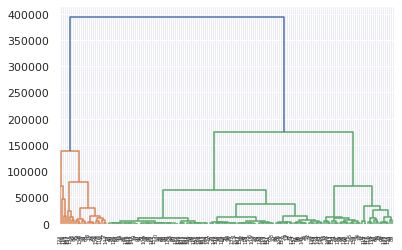

In [ ]:
dendrogram = sch.dendrogram(sch.linkage(x, method='ward'))

The highest vertical point where we dont see much intersection is between cluster line 2 and 3.

But since we want to have a distribution where there a bit of comparison, i'll proceed with 3.

## Introducing the Model

In [26]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
model.fit(x)
labels = model.labels_

In [27]:
labels

array([2, 2, 2, 2, 1, 1, 2, 0, 0, 2, 1, 1, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2,
       1, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       0, 2, 2, 2, 2, 1, 2, 1, 2, 0, 0, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 0, 2, 2, 2, 2, 0, 1, 0, 2, 0, 2, 1, 2, 2, 0, 2, 2, 1, 2, 2,
       2, 1, 1, 0, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 1, 2, 2, 0, 1, 2, 2, 2, 2, 2, 1, 1, 0, 2, 1, 2, 2, 1, 2, 2, 1,
       2, 0, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 0, 0, 0, 1, 2, 2, 1, 2, 2, 2])

In [28]:
# creating dataframe with countries and clusters
final_1 = pd.DataFrame({'clusters':labels,'country':country})
final_1

,clusters,country
0,2,Afghanistan
1,2,Albania
2,2,Algeria
3,2,Angola
4,1,Antigua and Barbuda
...,...,...
162,2,Vanuatu
163,1,Venezuela
164,2,Vietnam
165,2,Yemen


Plotting our clusters

In [ ]:
fig = px.choropleth(final_1,
                    locationmode='country names',
                    locations='country',
                    color='clusters',
                    title='Coutries by labels'
                   )
fig.show()

From the world map, we can clearly see that Hierachical clustering achieved the same result as the K-Means clustering.The only difference is in the color scheme but its more visually appealling and more conclusive.

##Conclusion

Africa and other developing countries are in deer need of Aid from the developed worlds. As much as this may be the case, certain areas also need to be looked at like fertility rates per person which are likely to affect the growth and GDP of a country in the long run hence better measures than financial aid should be looked into and implemented for a holistic treatement.